In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv(r"data_hotel.csv")

In [4]:
dataset

,Unnamed: 0,name,city,Check_in_date,Check_out_date,Rating,Review,Distance_to_city_center(km),Distance_to_Airpot(km),pool,...,free_parking,bathtub,restuarant,Airport_transfer,Bar,Kitchen,Connecting_rooms_available,Internet_access,Pet_friendly,PRICE
0,0,The Park Hyderabad,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,4.0,20.0,yes,...,yes,no,yes,yes,no,no,no,no,no,5040
1,1,The Westin Hyderabad Mindspace,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,9.9,22.0,yes,...,yes,no,yes,yes,no,no,no,no,no,7800
2,2,Courtyard by Marriott Hyderabad,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,4.7,21.0,yes,...,yes,no,yes,yes,no,no,no,no,no,6700
3,3,Courtyard by Marriott Hyderabad,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,4.7,21.0,yes,...,yes,no,yes,yes,no,no,no,no,no,6700
4,4,Radisson Blu Plaza Hotel Hyderabad Banjara Hills,Hyderabad,12-02-2021,14-02-2021,7.6,Good,4.5,20.0,yes,...,yes,no,yes,yes,no,no,no,no,no,6375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,5337,OYO 4161 Hotel Shailly Inn,Ahmedabad,12-02-2021,20-02-2021,NaN,NaN,4.9,9.7,no,...,yes,yes,no,no,no,no,no,no,no,46349
5338,5338,OYO 11427 Hotel Kalyan,Ahmedabad,12-02-2021,20-02-2021,NaN,NaN,1.6,8.0,no,...,no,yes,no,no,no,no,no,no,no,8793
5339,5339,Hotel Aagman,Ahmedabad,12-02-2021,20-02-2021,NaN,NaN,77.0,77.0,no,...,yes,no,no,no,no,no,no,no,no,5396
5340,5340,OYO 27638 Jay Radhe,Ahmedabad,12-02-2021,20-02-2021,NaN,NaN,11.0,16.0,no,...,no,yes,no,no,no,no,no,no,no,6950


In [501]:
dataset.drop(["Unnamed: 0"],axis=1,inplace=True)

In [502]:
dataset.isnull().any()

name                           False
city                           False
Check_in_date                  False
Check_out_date                 False
Rating                          True
Review                          True
Distance_to_city_center(km)     True
Distance_to_Airpot(km)          True
pool                           False
gym                            False
spa                            False
free_parking                   False
bathtub                        False
restuarant                     False
Airport_transfer               False
Bar                            False
Kitchen                        False
Connecting_rooms_available     False
Internet_access                False
Pet_friendly                   False
PRICE                          False
dtype: bool

In [503]:
dataset.dtypes

name                            object
city                            object
Check_in_date                   object
Check_out_date                  object
Rating                         float64
Review                          object
Distance_to_city_center(km)    float64
Distance_to_Airpot(km)         float64
pool                            object
gym                             object
spa                             object
free_parking                    object
bathtub                         object
restuarant                      object
Airport_transfer                object
Bar                             object
Kitchen                         object
Connecting_rooms_available      object
Internet_access                 object
Pet_friendly                    object
PRICE                            int64
dtype: object

# 1. Handle Missing values

In [504]:
dataset.median()

Rating                            4.0
Distance_to_city_center(km)       8.2
Distance_to_Airpot(km)           10.0
PRICE                          9397.5
dtype: float64

In [505]:
dataset.fillna(dataset.median(),inplace=True)

In [506]:
dataset["Review"].fillna("Good",inplace=True)

In [507]:
dataset.isnull().any()

name                           False
city                           False
Check_in_date                  False
Check_out_date                 False
Rating                         False
Review                         False
Distance_to_city_center(km)    False
Distance_to_Airpot(km)         False
pool                           False
gym                            False
spa                            False
free_parking                   False
bathtub                        False
restuarant                     False
Airport_transfer               False
Bar                            False
Kitchen                        False
Connecting_rooms_available     False
Internet_access                False
Pet_friendly                   False
PRICE                          False
dtype: bool

In [508]:
dataset["Review"].unique()

array(['Good', 'Exceptional', 'Superb', 'Fabulous', 'Very', '\n'],
      dtype=object)

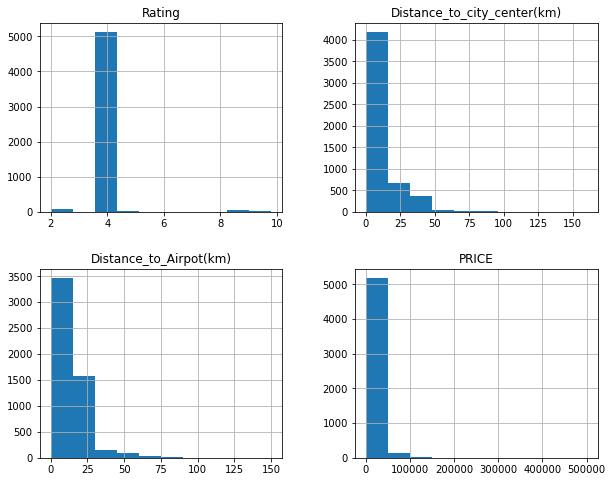

In [509]:
dataset.hist(figsize=(10,8))
plt.show()

# divide data into numerical and categorical type

In [510]:
num=[]

In [511]:
for col in dataset.columns:
    if(dataset[col].dtype!="object"):
          num.append(col)

In [512]:
dataset_num=dataset[num]

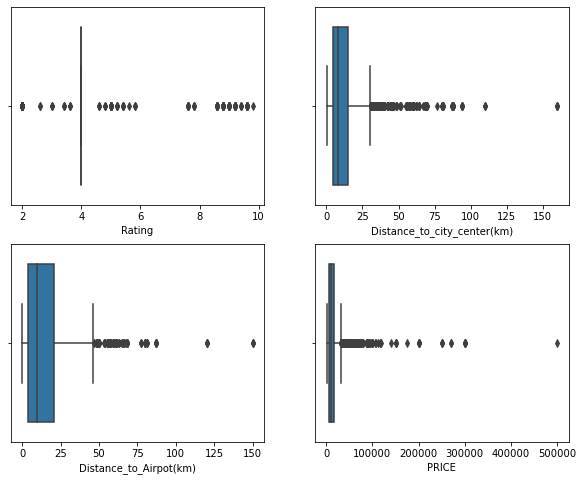

In [513]:
plt.figure(figsize=(10,8))
for i,col in enumerate(dataset_num.columns,1):
    plt.subplot(2,2,i)
    sns.boxplot(dataset_num[col])

C:\Users\Anjali\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


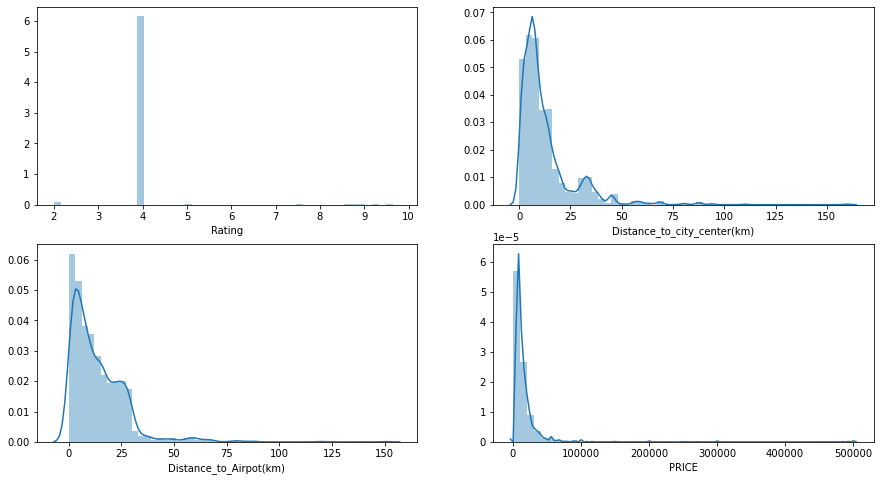

In [514]:
plt.figure(figsize=(15,8))
for i,col in enumerate(dataset_num.columns,1):
    plt.subplot(2,2,i)
    sns.distplot(dataset_num[col])

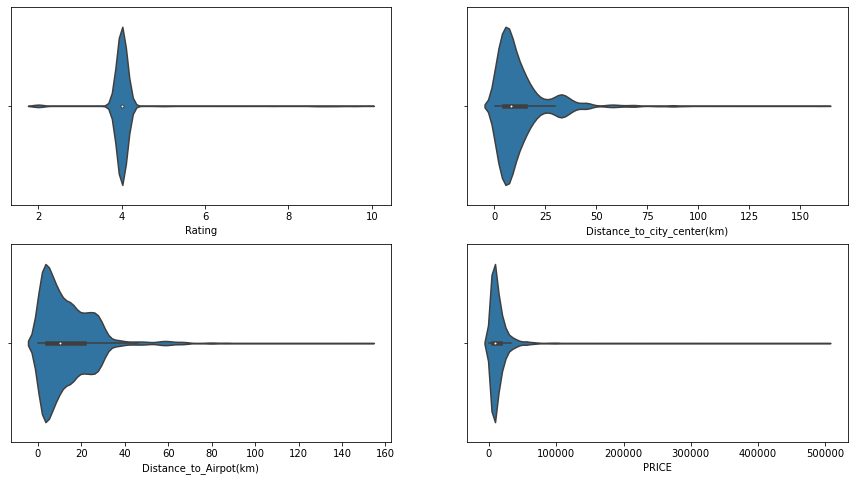

In [515]:
plt.figure(figsize=(15,8))

for i,col in enumerate(dataset_num.columns,1):
              plt.subplot(2,2,i)
              sns.violinplot(dataset_num[col])

In [516]:
cat=[]

In [517]:
for col in dataset.columns:
    if(dataset[col].dtype=="object"):
          cat.append(col)

In [518]:
dataset_cat=dataset[cat]

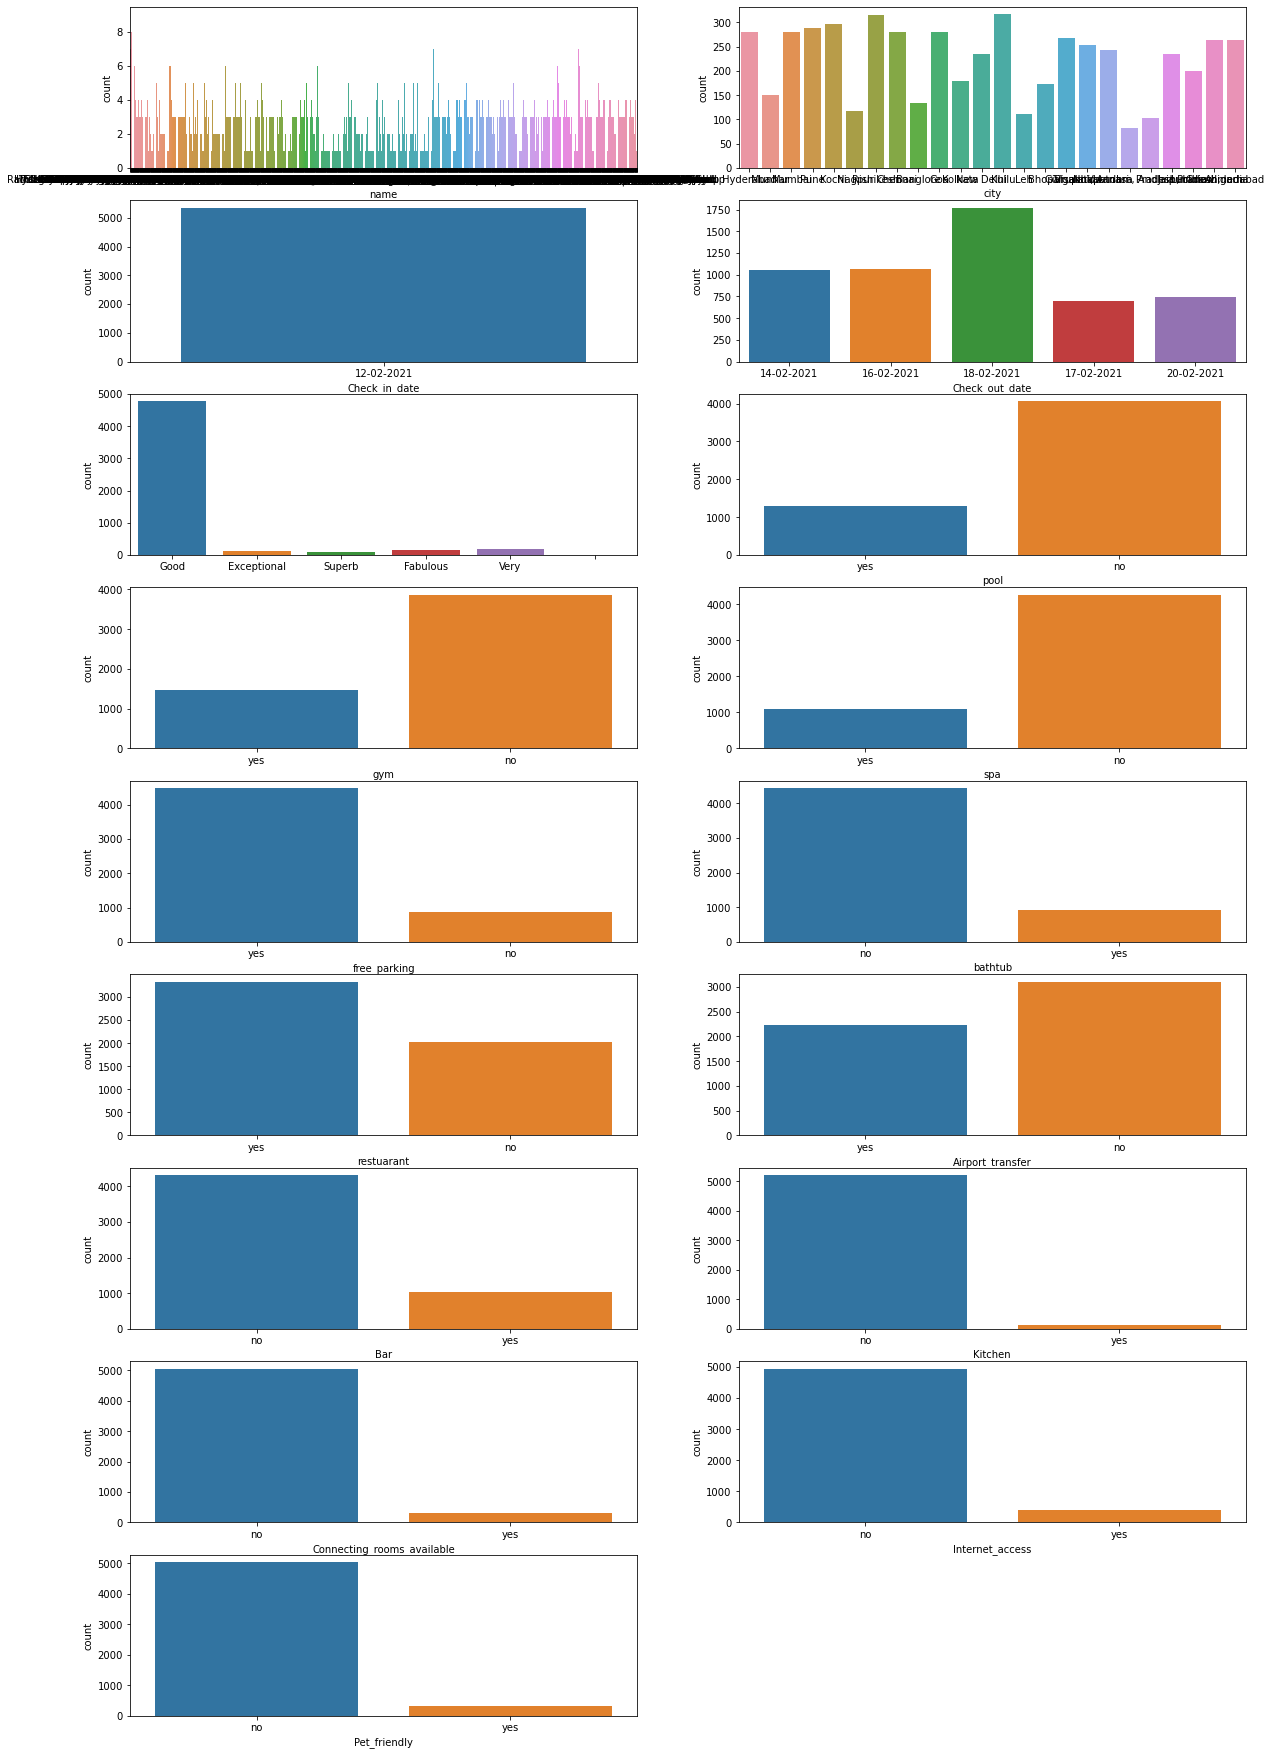

In [519]:
plt.figure(figsize=(20,35))
for i,col in enumerate(dataset_cat.columns,1):
    plt.subplot(10,2,i)
    sns.countplot(dataset_cat[col])

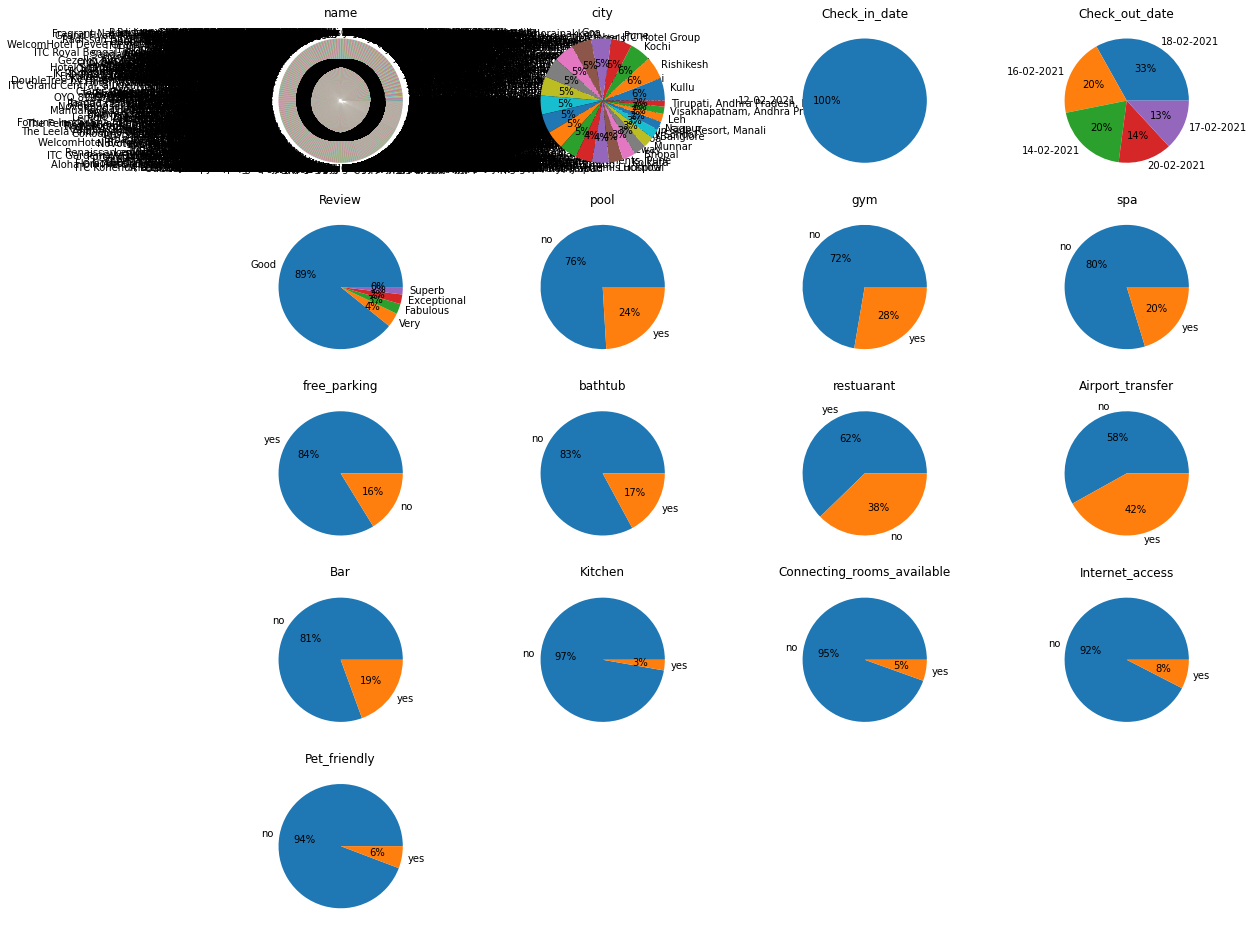

In [520]:
plt.figure(figsize=(18,20))

for i,col in enumerate(dataset_cat.columns,1):
              plt.subplot(6,4,i)
              plt.pie(dataset_cat[col].value_counts(),labels=dataset_cat[col].value_counts().index,autopct="%1.f%%")
              plt.title(col)

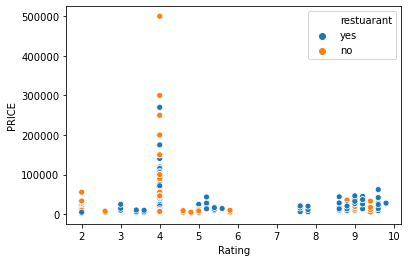

In [521]:
sns.scatterplot(x=dataset['Rating'],y=dataset['PRICE'],hue=dataset["restuarant"])

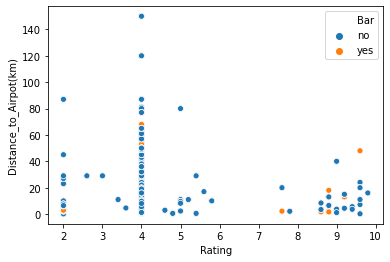

In [522]:
sns.scatterplot(x=dataset['Rating'],y=dataset['Distance_to_Airpot(km)'],hue=dataset['Bar'])

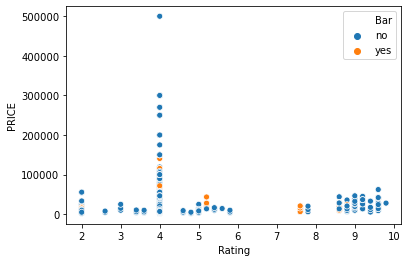

In [523]:
sns.scatterplot(x=dataset['Rating'],y=dataset['PRICE'],hue=dataset['Bar'])

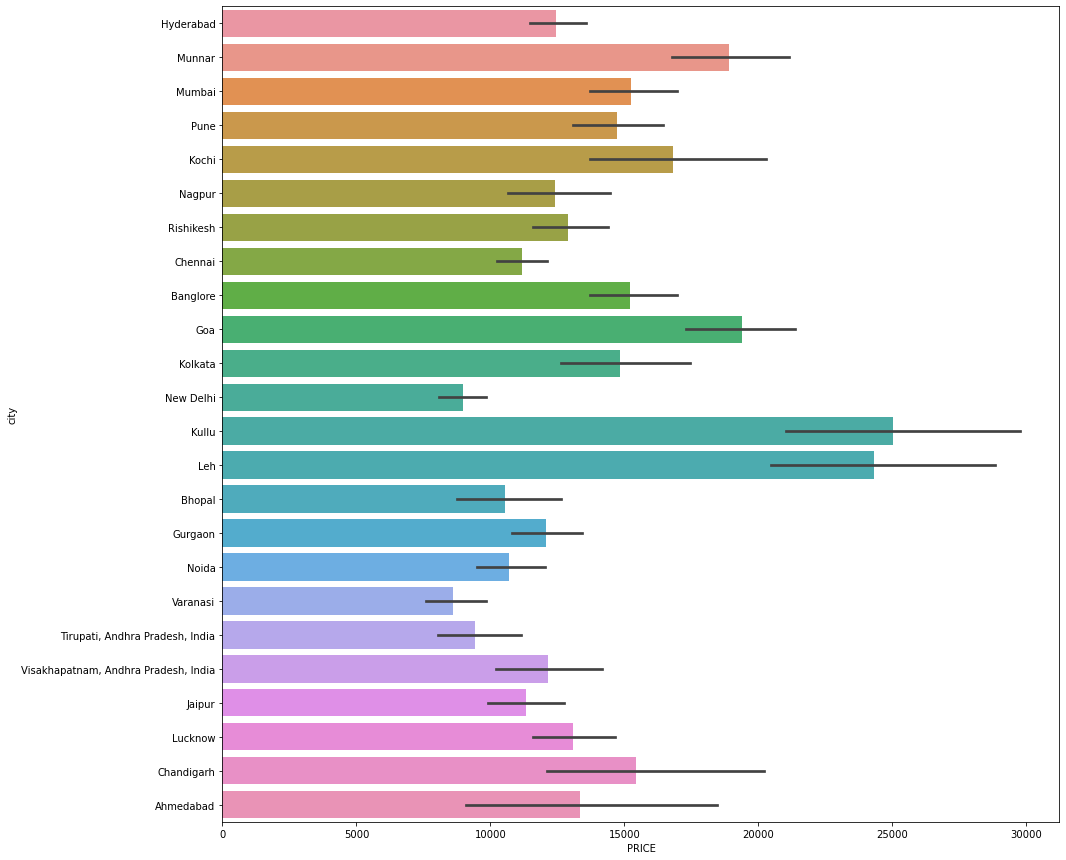

In [6]:
plt.figure(figsize=(15,15))
sns.barplot(dataset['PRICE'],dataset['city'])

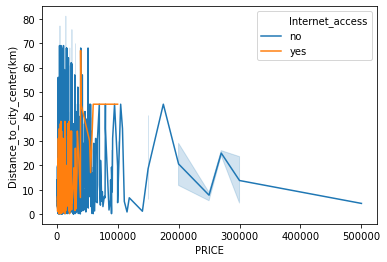

In [525]:
sns.lineplot(x=dataset['PRICE'],y=dataset['Distance_to_city_center(km)'],hue=dataset['Internet_access'])

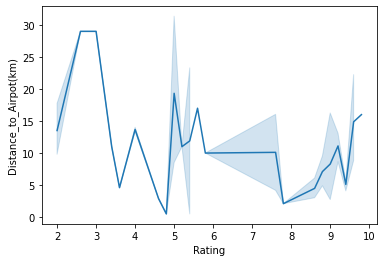

In [526]:
sns.lineplot(x=dataset['Rating'],y=dataset['Distance_to_Airpot(km)'])

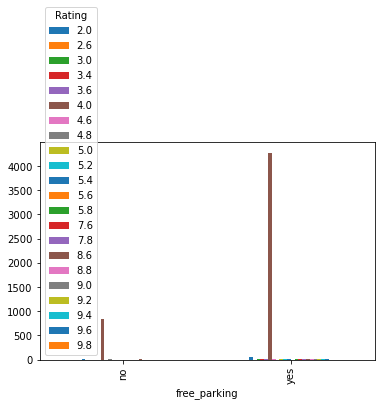

In [527]:
pd.crosstab(dataset['free_parking'],dataset["Rating"]).plot(kind="bar")

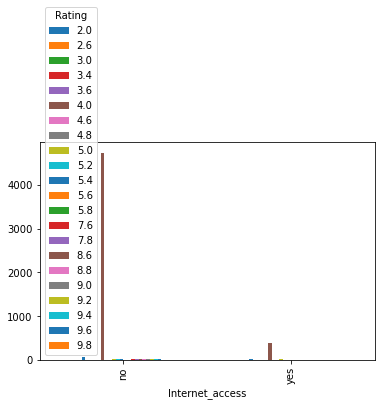

In [528]:
pd.crosstab(dataset['Internet_access'],dataset["Rating"]).plot(kind="bar")

In [529]:
dataset

,name,city,Check_in_date,Check_out_date,Rating,Review,Distance_to_city_center(km),Distance_to_Airpot(km),pool,gym,...,free_parking,bathtub,restuarant,Airport_transfer,Bar,Kitchen,Connecting_rooms_available,Internet_access,Pet_friendly,PRICE
0,The Park Hyderabad,Hyderabad,12-02-2021,14-02-2021,4.0,Good,4.0,20.0,yes,yes,...,yes,no,yes,yes,no,no,no,no,no,5040
1,The Westin Hyderabad Mindspace,Hyderabad,12-02-2021,14-02-2021,4.0,Good,9.9,22.0,yes,yes,...,yes,no,yes,yes,no,no,no,no,no,7800
2,Courtyard by Marriott Hyderabad,Hyderabad,12-02-2021,14-02-2021,4.0,Good,4.7,21.0,yes,yes,...,yes,no,yes,yes,no,no,no,no,no,6700
3,Courtyard by Marriott Hyderabad,Hyderabad,12-02-2021,14-02-2021,4.0,Good,4.7,21.0,yes,yes,...,yes,no,yes,yes,no,no,no,no,no,6700
4,Radisson Blu Plaza Hotel Hyderabad Banjara Hills,Hyderabad,12-02-2021,14-02-2021,7.6,Good,4.5,20.0,yes,yes,...,yes,no,yes,yes,no,no,no,no,no,6375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,OYO 4161 Hotel Shailly Inn,Ahmedabad,12-02-2021,20-02-2021,4.0,Good,4.9,9.7,no,no,...,yes,yes,no,no,no,no,no,no,no,46349
5338,OYO 11427 Hotel Kalyan,Ahmedabad,12-02-2021,20-02-2021,4.0,Good,1.6,8.0,no,no,...,no,yes,no,no,no,no,no,no,no,8793
5339,Hotel Aagman,Ahmedabad,12-02-2021,20-02-2021,4.0,Good,77.0,77.0,no,no,...,yes,no,no,no,no,no,no,no,no,5396
5340,OYO 27638 Jay Radhe,Ahmedabad,12-02-2021,20-02-2021,4.0,Good,11.0,16.0,no,no,...,no,yes,no,no,no,no,no,no,no,6950


In [530]:
dataset.isnull().any()

name                           False
city                           False
Check_in_date                  False
Check_out_date                 False
Rating                         False
Review                         False
Distance_to_city_center(km)    False
Distance_to_Airpot(km)         False
pool                           False
gym                            False
spa                            False
free_parking                   False
bathtub                        False
restuarant                     False
Airport_transfer               False
Bar                            False
Kitchen                        False
Connecting_rooms_available     False
Internet_access                False
Pet_friendly                   False
PRICE                          False
dtype: bool

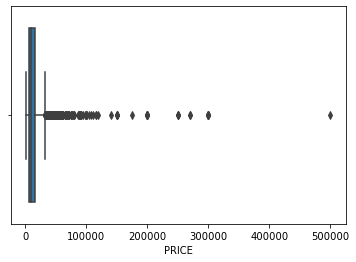

In [532]:
sns.boxplot(dataset["PRICE"])

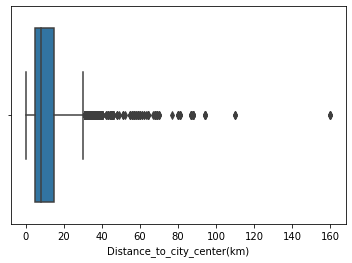

In [533]:
sns.boxplot(dataset["Distance_to_city_center(km)"])

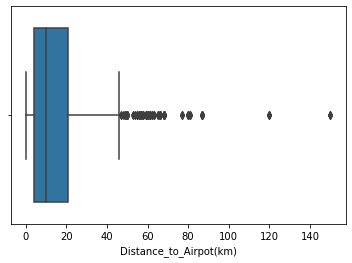

In [534]:
sns.boxplot(dataset["Distance_to_Airpot(km)"])

In [535]:
data_num=[]

In [536]:
for i in dataset.columns:
    if dataset[i].dtypes!="object":
        data_num.append(i)

In [537]:
dataset_num=dataset[data_num]

In [538]:
for col in dataset_num.columns:
    q1=dataset_num[col].describe()["25%"]
    q3=dataset_num[col].describe()["75%"]
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    count=dataset_num[(dataset_num[col]<lb)  | (dataset_num[col]>ub)].shape[0]
    p=count/5342*100
if (count>0):
            print("======================"+col+"======================")
            print("count",count)
            print("Percentage",p)

======================PRICE======================
count 381
Percentage 7.1321602396106325


In [539]:
name_dict=dataset["name"].value_counts().to_dict()

In [540]:
dataset["name"]=dataset["name"].replace(name_dict)

In [541]:
city_dict=dataset["city"].value_counts().to_dict()

In [475]:
dataset["city"]=dataset["city"].replace(city_dict)

In [477]:
dataset=pd.get_dummies(dataset, drop_first=True)

In [482]:
dataset=dataset[["name","city","Rating","Distance_to_city_center(km)","Distance_to_Airpot(km)","Check_out_date_16-02-2021","Check_out_date_17-02-2021","Check_out_date_18-02-2021","Check_out_date_20-02-2021","spa_yes","free_parking_yes","bathtub_yes","restuarant_yes","Airport_transfer_yes","Bar_yes","Kitchen_yes","Connecting_rooms_available_yes","Internet_access_yes","Pet_friendly_yes","PRICE"]]


In [483]:
dataset

,name,city,Rating,Distance_to_city_center(km),Distance_to_Airpot(km),Check_out_date_16-02-2021,Check_out_date_17-02-2021,Check_out_date_18-02-2021,Check_out_date_20-02-2021,spa_yes,free_parking_yes,bathtub_yes,restuarant_yes,Airport_transfer_yes,Bar_yes,Kitchen_yes,Connecting_rooms_available_yes,Internet_access_yes,Pet_friendly_yes,PRICE
0,2511,837,4.0,4.0,20.0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,5040
1,380,837,4.0,9.9,22.0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,7800
2,63,837,4.0,4.7,21.0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,6700
3,63,837,4.0,4.7,21.0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,6700
4,1204,837,7.6,4.5,20.0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,6375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,648,528,4.0,4.9,9.7,0,0,0,1,0,1,1,0,0,0,0,0,0,0,46349
5338,648,528,4.0,1.6,8.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,8793
5339,417,528,4.0,77.0,77.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5396
5340,1204,528,4.0,11.0,16.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,6950


# Splitting into train and test data

In [489]:
x=dataset.iloc[:,0:19].values

In [490]:
y=dataset.iloc[:,19]

In [491]:
from sklearn.model_selection import train_test_split

In [492]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Scaling

In [495]:
from sklearn.preprocessing import StandardScaler

In [496]:
sc=StandardScaler()

In [497]:
x_train=sc.fit_transform(x_train)

In [498]:
x_test=sc.transform(x_test)

# Building a model